# Visualizing the `distribution` of a dataset

[Tutorial](http://seaborn.pydata.org/tutorial.html#tutorial)

## 1 - Visualizing the distribution

In [1]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate

In [5]:
sns.set(color_codes=True)

In [6]:
np.random.seed(sum(map(ord, "distributions")))

In [7]:
mean, cov =[0,1], [(1,.5), (0.5,1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

### `sns.distplot()`
plot distribution
- `hist`: 是否显示直方图
- `kde`: 是否显示密度曲线
- `rug`: 是否显示“小地毯”

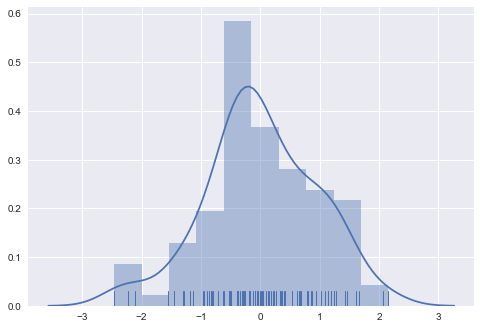

In [24]:
x=np.random.normal(size=100)
sns.distplot(x,rug=True,);

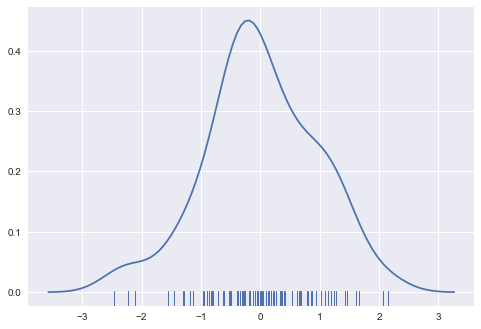

In [35]:
sns.distplot(x, bins=30, rug=True, hist=False);

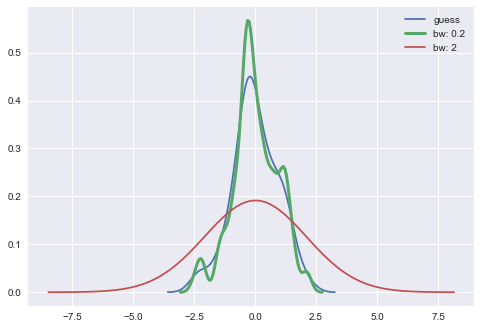

In [46]:
sns.kdeplot(x, label="guess")
sns.kdeplot(x, bw=.2, label="bw: 0.2",lw=3)
sns.kdeplot(x, bw=2, label="bw: 2");

### `sns.kdeplot()`
- `cut` : 曲线两端延伸长度，只影响曲线的位置和比例 ，不影响拟合的结果
- `bw` : 估算概率密度时，直方图的 `bandwidth`

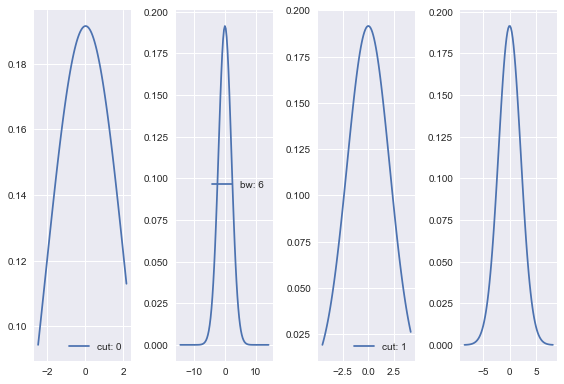

In [67]:
plt.subplot(141)
sns.kdeplot(x, bw=2, label="cut: 0",cut=0);
plt.subplot(142)
sns.kdeplot(x, bw=2, label="bw: 6",cut=6);
plt.subplot(143)
sns.kdeplot(x, bw=2, cut=1 ,label="cut: 1");
plt.subplot(144)
sns.kdeplot(x, bw=2);
plt.tight_layout()

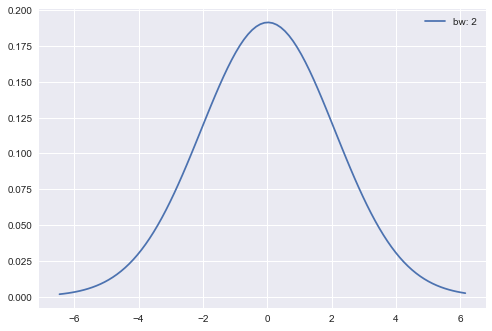

In [52]:
sns.kdeplot(x, bw=2, label="bw: 2",cut=2);

## 2 - Plotting bivariate distributions

### `sns.jointplot()`

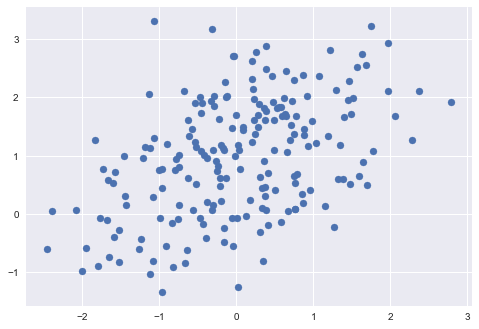

In [96]:
plt.scatter(df["x"],df["y"]);

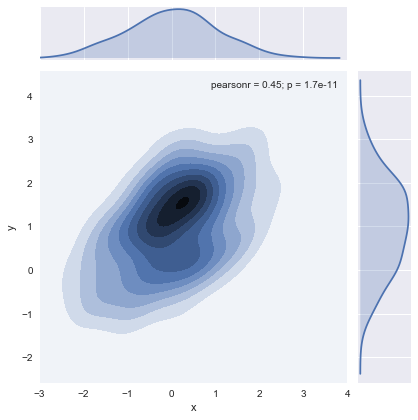

In [112]:
sns.jointplot(x="x", y="y", data=df, kind = "kde",xlim=(-3,4));

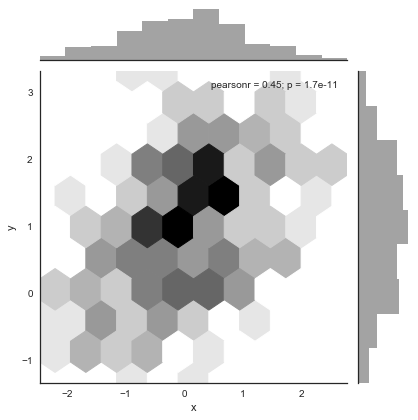

In [111]:
with sns.axes_style("white"):
    sns.jointplot(x="x", y="y", data=df, kind="hex", color="k")

### `sns.rugplot()`

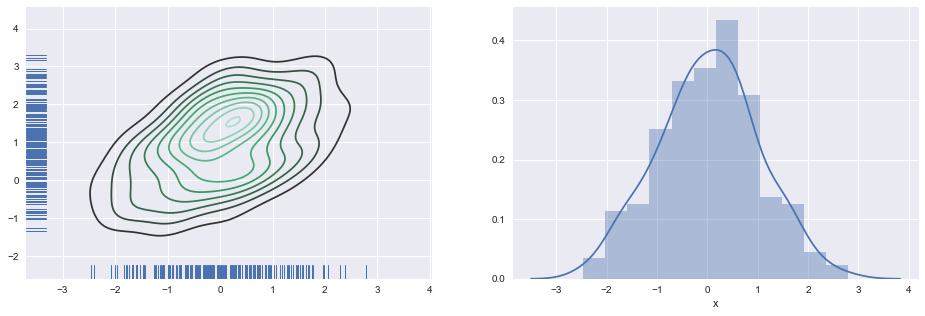

In [141]:
f, axes= plt.subplots(ncols=2,figsize=(16,5))
sns.kdeplot(data=df,ax=axes[0]);
sns.rugplot(df.x, ax=axes[0]);
sns.rugplot(df.y, vertical=True,ax=axes[0]);
sns.distplot(df.x,ax=axes[1]);

### `cmap`

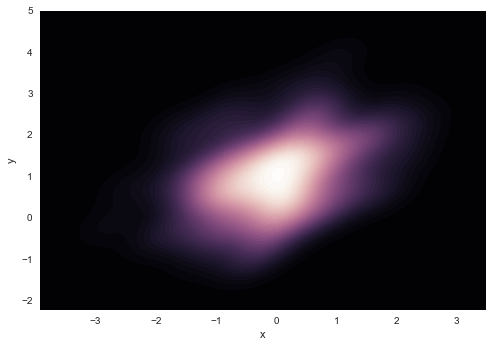

In [15]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap,shade=True, n_levels=60);

### [`sns.JiontGrid()`](http://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid)
`sns.JointGrid(x, y, data=None, size=6, ratio=5, space=0.2, dropna=True, xlim=(0,5), ylim=(1,3))`
- `ratio` : Ratio of joint axes size to marginal axes height.
- `g.ax_marg_x` : AxesSubplot 对象，`matplotlib` 的子绘图区域
- `g.ax_marg_y` : 同上

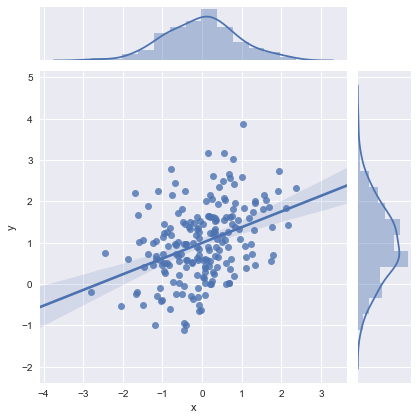

In [28]:
g = sns.JointGrid(x="x", y="y", data=df)
g.plot(sns.regplot, sns.distplot);

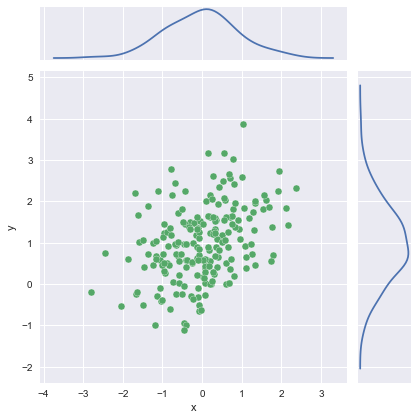

In [41]:
g = sns.JointGrid(x="x", y="y", data=df)
g = g.plot_joint(plt.scatter, color="g", edgecolor="white")
g = g.plot_marginals(sns.kdeplot)

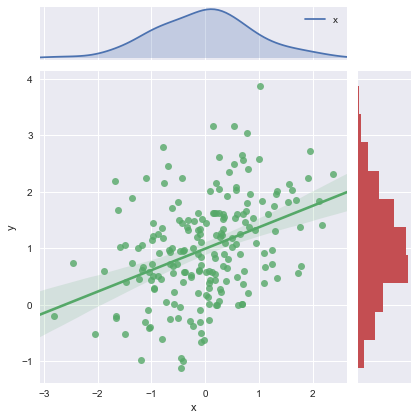

In [80]:
g = sns.JointGrid(df.x, df.y)
_ = g.plot_joint(sns.regplot, color="g")
# _ = g.ax_marg_x.hist(df.x)
sns.kdeplot(df.x, shade=True, ax=g.ax_marg_x)
_ = g.ax_marg_y.hist(df.y, orientation="horizontal",color="r")

#### `sns.JointGrid(..., ration=2)`
`sns.JointGrid(..., space=1, size=5, ration=2)`


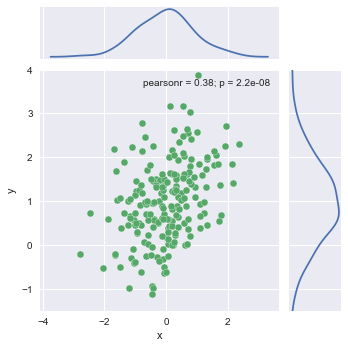

In [92]:
g = sns.JointGrid(x="x", y="y", data=df, size=5, ratio=4, ylim=(-1.5,4))
g = g.plot_joint(plt.scatter, color="g", edgecolor="white")
g = g.plot_marginals(sns.kdeplot)
g = g.annotate(stats.pearsonr)